<a href="https://colab.research.google.com/github/skj092/Kaggle_Competition/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the dataset and Setting up Directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!touch kaggle.json 

In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!chmod 600 /content/kaggle.json 

In [ ]:
# Downloading the dataset
!kaggle competitions download -c dog-breed-identification

 97% 671M/691M [00:02<00:00, 275MB/s]
100% 691M/691M [00:02<00:00, 259MB/s]


In [ ]:
!mkdir input-data

In [ ]:
!unzip -q dog-breed-identification.zip -d input-data

# Importing the libraries and EDA

In [144]:
# !pip install wandb -qqq

In [145]:
from fastai.vision.all import *
from fastai.callback.wandb import *

In [146]:
path = Path('/content/input-data')
Path.BASE_PATH = path
path.ls()

(#4) [Path('labels.csv'),Path('sample_submission.csv'),Path('test'),Path('train')]

In [147]:
labels = pd.read_csv(path/'labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [148]:
print('shape of the dataset', labels.shape)
print('total unique breed', labels.breed.nunique())

shape of the dataset (10222, 2)
total unique breed 120


In [149]:
print('total number of images per breed')
labels['breed'].value_counts()

total number of images per breed


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

`images per class vary and also the images are very less `

# Dataset and DataLoader

In [150]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x = ColReader(0, pref=path/'train', suff='.jpg'),
                   get_y=ColReader(1), 
                   splitter=RandomSplitter(),
                   item_tfms=Resize(224))

In [151]:
dls = dblock.dataloaders(labels)

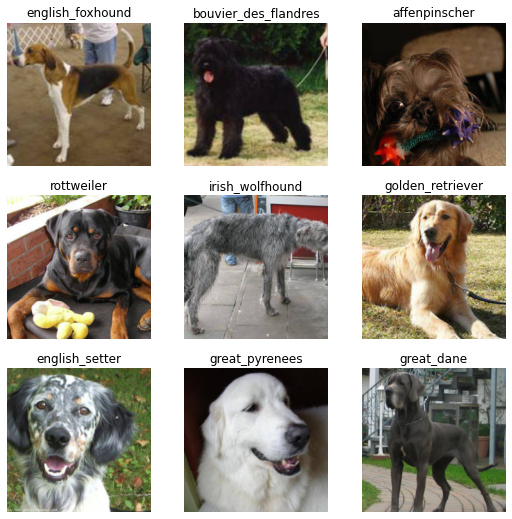

In [152]:
# show one batch
dls.show_batch()

# Modelling

In [153]:
# experimentation on subser of dataset
df = labels.sample(frac=1)
print('df shape', df.shape)
dls = dblock.dataloaders(df)

df shape (10222, 2)


In [154]:
# vision leaner
learn = vision_learner(dls, resnet34, metrics=error_rate)

# setting up wandb for tracking 
import wandb
wandb.init(project="dog-breed-identification")

# training
learn.fine_tune(2)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


epoch,train_loss,valid_loss,error_rate,time
0,2.553681,0.961906,0.286204,01:13


epoch,train_loss,valid_loss,error_rate,time
0,1.132747,0.811230,0.240705,01:13
1,0.619972,0.662196,0.212329,01:15


In [155]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.print_classification_report()

# prediction on Test Dataloader

In [156]:
test_df = pd.read_csv(path/'sample_submission.csv')

In [157]:
test_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [158]:
# creating test dataloader
test_dl = learn.dls.test_dl(get_image_files(path/'test'))

In [159]:
preds, _ = learn.get_preds(dl=test_dl)

In [160]:
torch.cuda.empty_cache()

In [161]:
test_files = get_image_files(path/"test")
test_dl = dls.test_dl(test_files, bs=64)

In [162]:
preds, targs = learn.get_preds(dl=test_dl)

In [163]:
sub = pd.DataFrame({"id":test_files.map(lambda x:x.stem)})
sub[list(dls.vocab)] = preds
sub.to_csv("submission.csv", index=False)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [164]:
submission = pd.read_csv('submission.csv')
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,9f4bbcd8a5b189514d3098516983621a,8.668133e-05,0.000017,4.459736e-06,0.001962,7.906878e-06,0.000051,0.002156,2.141378e-05,0.000011,...,0.000015,0.000005,1.122350e-03,1.200630e-05,0.000088,0.000011,3.478962e-06,8.280069e-05,0.000895,0.000041
1,6b03bc633b0976b42218b99bcec7df91,4.073239e-05,0.000025,3.523889e-06,0.000004,1.823106e-03,0.000276,0.000023,8.785249e-07,0.000018,...,0.000009,0.000009,1.981528e-04,3.163838e-04,0.000103,0.000006,2.571534e-06,2.114003e-05,0.000031,0.000428
2,6b4cbaf60d7ab38c6ffa434bbfa81d96,1.973227e-06,0.000021,9.506633e-07,0.000083,8.207076e-08,0.000024,0.000014,3.765223e-07,0.000001,...,0.000001,0.000003,4.399126e-05,2.378529e-07,0.000029,0.000007,1.868530e-07,4.220253e-07,0.000001,0.000016
3,84590d2967993bf557e99de3d20658cd,3.055032e-07,0.000004,1.174999e-06,0.000002,3.547429e-05,0.000020,0.000006,1.507567e-03,0.000056,...,0.000002,0.000029,1.240801e-07,7.061172e-05,0.000006,0.000048,9.145110e-06,1.067448e-05,0.000010,0.000002
4,49921c74099d16b3f017ad6760fd3987,1.881483e-05,0.001006,1.691637e-03,0.000231,2.499724e-06,0.000112,0.000096,2.913875e-05,0.000057,...,0.000010,0.000017,4.552737e-06,5.978390e-06,0.000007,0.000030,3.526995e-06,2.216118e-04,0.000039,0.000017


# Submission

In [165]:
!kaggle competitions submit -c dog-breed-identification -f /content/submission.csv -m "resnet34-baseline"

100% 16.3M/16.3M [00:02<00:00, 8.22MB/s]
Successfully submitted to Dog Breed Identification